In [1]:
!pip install matplotlib
!pip install pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

In [21]:
# Replace 'your_file.txt' with the path to your text file
txt_file = '../global_search.txt'

arr_bops = []
arr_dist = []

with open(txt_file, "r") as f:
    lines = f.readlines()[2000:] #This determines which trials you are looking at, rn this is for Deepsets
    for line in lines:
        arr_line = line.split(' ')

        bops = float(arr_line[5].replace(",", "")) #change to arr_line[6] if you want to use BraggNN
        acc = float(arr_line[3].replace(",", "")) #change to arr_line[4] if you want to use BraggNN

        #This code snippet just helps me find models that are better than x or y amount.
        if bops < 236000 and acc > .656: #if bops < 800000000 and acc < .23: 
            print('Found model:', bops, acc) 
        arr_bops.append(bops)
        arr_dist.append(acc)
        
x = arr_bops
y = arr_dist

Found model: 218296.15625 0.656064752809643
Found model: 163268.078125 0.656106346341017



BOPS, Accuracy

ADDING SEQUENCE NORM
Nano 26324.078125 0.6217567443911123
Tiny 47760.15625 0.63521641114373
Small 84984.15625 0.645954197203251
Base 163268.078125 0.656106346341017
Large 387736.15625 0.6622938000682134
XL 1108784.25 0.668717505053614

Nano 26324.078125, 0.6217567443911123
Tiny 47142.0390625, 0.6321950570247316
Base 218296.15625, 0.656064752809643
Large 387736.15625, 0.6622938000682134

deepsets = 236376.15625 0.6164876758366539



 -> Trial 735, Accuracy: 0.635216411143739, BOPs: 47760.15625, Inference time: 0.010643482208251953, Validation Loss: 0.9602443802924383, Param Count: 639, Hyperparams: {'bottleneck_dim': 5, 'aggregator_type': 0, 'phi_len': 1, 'phi_MLP_acts_0': 1, 'phi_MLP_norms_0': 'batch', 'rho_len': 4, 'rho_MLP_width_0': 1, 'rho_MLP_width_1': 1, 'rho_MLP_width_2': 1, 'rho_MLP_acts_0': 1, 'rho_MLP_acts_1': 0, 'rho_MLP_acts_2': 0, 'rho_MLP_acts_3': 2, 'rho_MLP_norms_0': 'batch', 'rho_MLP_norms_1': None, 'rho_MLP_norms_2': 'sequence', 'rho_MLP_norms_3': 'batch'}

In [46]:
print(135483678720.0 / 4468480000)

30.31985792036666


/tmp/ipykernel_3304789/2358597451.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis_r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

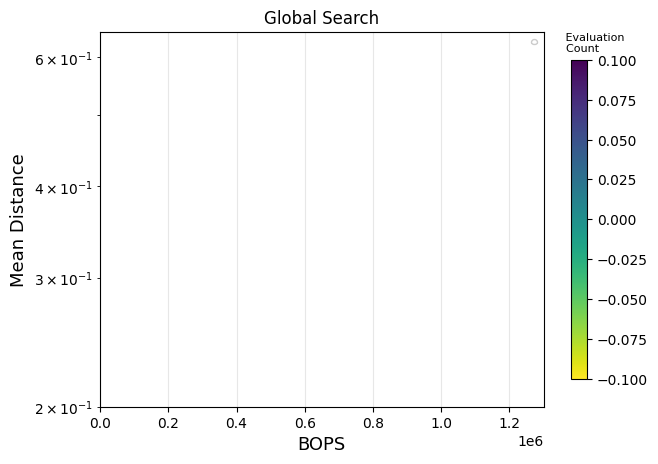

In [7]:
fig, ax = plt.subplots(figsize=(7,5))

# Select colormap and define count
cm = plt.cm.get_cmap('viridis_r')
count = [x for x in range(len(x))]

ax.scatter(x, y, marker='o', lw=3, alpha=0.8, c=count, 
        cmap=cm, label='', s=10)
ax.set_title('Global Search')#'Morph Search Results')
ax.set_xlabel('BOPS', fontsize=13)
ax.set_ylabel('Mean Distance', fontsize=13)
ax.legend(fancybox=True, fontsize=10, framealpha=1, borderpad=0.2, loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 1.3e6)
ax.set_ylim(0.2, .65)
ax.set_yscale('log')
#ax.set_xscale('log')

# Eval Count bar
norm = plt.Normalize(0, len(x))
sm = ScalarMappable(norm=norm, cmap=cm)
cbar = fig.colorbar(sm, ax=ax, shrink=0.85)
cbar.ax.set_title("         Evaluation\n  Count", fontsize=8)

fig.tight_layout(pad=2)
plt.show 
#plt.savefig('global_search_zoom.png')

/tmp/ipykernel_2520983/1927047807.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis_r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


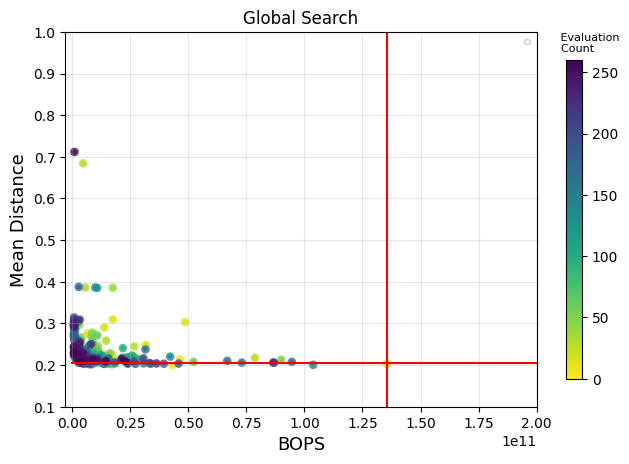

In [43]:
fig, ax = plt.subplots(figsize=(7,5))

# Select colormap and define count
cm = plt.cm.get_cmap('viridis_r')
count = [x for x in range(len(x))]

ax.scatter(x, y, marker='o', lw=3, alpha=0.8, c=count, 
        cmap=cm, label='', s=10)
ax.set_title('Global Search')#'Morph Search Results')
ax.set_xlabel('BOPS', fontsize=13)
ax.set_ylabel('Mean Distance', fontsize=13)
ax.legend(fancybox=True, fontsize=10, framealpha=1, borderpad=0.2, loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_xlim(-3e9, 2e11)
ax.set_ylim(0.1, 1)
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.plot([0, 1e12], [0.20396684110164642]*2, color='red')
plt.plot([135483678720.0]*2, [0,5], color='red')

# Eval Count bar
norm = plt.Normalize(0, len(x))
sm = ScalarMappable(norm=norm, cmap=cm)
cbar = fig.colorbar(sm, ax=ax, shrink=0.85)
cbar.ax.set_title("         Evaluation\n  Count", fontsize=8)

fig.tight_layout(pad=2)
plt.show 
plt.savefig('global_search_full.png')

conv_sparsity = 0.7917
    block1_sparsity = {'layers[0]':0.8750, 'layers[2]':0.5703}
    block2_sparsity = {'layers[0]':0.3594, 'layers[2]':0.2865}
    block3_sparsity = {'layers[0]':0.4249, 'layers[2]':0.9544}
    mlp_sparsity = {'layers[0]':0.9562,'layers[3]':0.2812,'layers[5]':0.1875,'layers[8]':0.7500}


In [23]:
!pip install brevitas

  Using cached brevitas-0.9.1-py3-none-any.whl (411 kB)
  Using cached dependencies-2.0.1-py2.py3-none-any.whl (15 kB)


In [29]:
from models.blocks import *

ModuleNotFoundError: No module named 'brevitas'

/tmp/ipykernel_2286537/905435205.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis_r')
/tmp/ipykernel_2286537/905435205.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter([bops[i] for i in idx], [mean_dist[i] for i in idx],


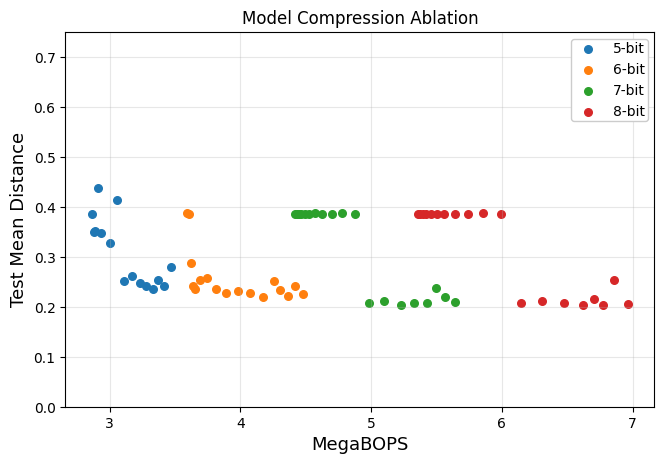

In [50]:
bops = [3469799.9682160006, 5643271.968216, 6962879.968216, 4478911.968216, 3418175.3282160005, 5563097.933015999, 6859209.3890160015, 4418765.990616, 5496702.541015999, 3371495.848216001, 6777984.070616, 4366060.147416, 5424666.6610159995, 4306841.357016, 3332965.8882160005, 6708200.109015999, 5329802.817816, 4255611.9170160005, 3281290.2082160003, 3231597.968216001, 6623122.912216001, 5231581.965016001, 6478867.936216001, 4174641.6386160003, 4073440.0514160004, 3169390.768216001, 5101541.923416, 6309630.841816, 3984403.584216, 3110209.5682160007, 4983443.064216, 4874669.728216001, 6143592.621016, 3888820.761816, 5990870.393816002, 5853345.453016001, 4781027.435416, 3055517.728216001, 3812369.8370160004, 5738154.771416, 4699857.249816, 3004264.6082160007, 5640488.416216, 4627060.497816001, 3745065.273816, 2964321.248216001, 4570551.424215999, 5560650.310616, 3691692.4226160003, 4525787.297816001, 2932686.6082160007, 4494766.377816001, 5502496.941016, 3657076.4930160004, 2908912.9682160006, 4466895.177816001, 5457147.769816, 5417359.123416, 3636657.293016, 3623561.1266160007, 2891430.888216001, 4447359.3090160005, 5396015.789016, 2877475.4882160006, 3608591.2322160006, 4430055.174616001, 5375395.705816001, 5358079.456216001, 2866055.328216001, 4418588.077016001, 3596071.641816]
mean_dist = [0.279821515083313, 0.21049463748931885, 0.20615828037261963, 0.22572201490402222, 0.2406720668077469, 0.21884584426879883, 0.25309497117996216, 0.24173560738563538, 0.23712921142578125, 0.2531543970108032, 0.2037074863910675, 0.2209101915359497, 0.20781441032886505, 0.23381265997886658, 0.2351931482553482, 0.21520186960697174, 0.20836129784584045, 0.25230133533477783, 0.2410731464624405, 0.24798335134983063, 0.20304420590400696, 0.2040361613035202, 0.20662595331668854, 0.21943895518779755, 0.22790445387363434, 0.2611638009548187, 0.21100102365016937, 0.2118453085422516, 0.2318207323551178, 0.2514979839324951, 0.20740580558776855, 0.3854095935821533, 0.20761515200138092, 0.22740241885185242, 0.3855399191379547, 0.38700178265571594, 0.38714295625686646, 0.4135848581790924, 0.23579122126102448, 0.38549619913101196, 0.3853241503238678, 0.3268088698387146, 0.3853423297405243, 0.3860856592655182, 0.25814929604530334, 1.194662094116211, 0.38695529103279114, 0.3853284418582916, 0.25437095761299133, 0.38529735803604126, 0.34698450565338135, 0.3853236138820648, 0.38529855012893677, 0.23626485466957092, 0.438170462846756, 0.38542330265045166, 0.3854779005050659, 0.3860263228416443, 0.24229267239570618, 0.28699150681495667, 0.351337194442749, 0.38527947664260864, 0.3855028748512268, 0.34978172183036804, 0.38530731201171875, 0.38524821400642395, 0.38613104820251465, 0.3861105442047119, 0.3854482173919678, 0.38529595732688904, 0.38693636655807495]
bits = [5.0, 7.0, 8.0, 6.0, 5.0, 7.0, 8.0, 6.0, 7.0, 5.0, 8.0, 6.0, 7.0, 6.0, 5.0, 8.0, 7.0, 6.0, 5.0, 5.0, 8.0, 7.0, 8.0, 6.0, 6.0, 5.0, 7.0, 8.0, 6.0, 5.0, 7.0, 7.0, 8.0, 6.0, 8.0, 8.0, 7.0, 5.0, 6.0, 8.0, 7.0, 5.0, 8.0, 7.0, 6.0, 5.0, 7.0, 8.0, 6.0, 7.0, 5.0, 7.0, 8.0, 6.0, 5.0, 7.0, 8.0, 8.0, 6.0, 6.0, 5.0, 7.0, 8.0, 5.0, 6.0, 7.0, 8.0, 8.0, 5.0, 7.0, 6.0]

# Convert bops to MegaBOPS
bops = [b / 1e6 for b in bops]

# Create plot
fig, ax = plt.subplots(figsize=(7,5))
cm = plt.cm.get_cmap('viridis_r')

# Plot each set of points with unique bit value
unique_bits = sorted(set(bits))
for bit in unique_bits:
    idx = [i for i, x in enumerate(bits) if x == bit]
    ax.scatter([bops[i] for i in idx], [mean_dist[i] for i in idx], 
               label=f'{int(bit)}-bit', cmap=cm, s=30)

ax.set_title('Model Compression Ablation')
ax.set_xlabel('MegaBOPS', fontsize=13)
ax.set_ylabel('Test Mean Distance', fontsize=13)
ax.legend(fancybox=True, fontsize=10, framealpha=1, borderpad=0.2, loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_ylim(0, .75)


fig.tight_layout(pad=2)
plt.show 
plt.savefig('modelcompression.pdf')

In [1]:
import torch

In [6]:
x = torch.randn((3,5,6))
torch.max(x, dim=1).values.size()

torch.Size([3, 6])